# Telecustomer Churn Analysis

## Importing Packages

In [70]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing  import PolynomialFeatures
from sklearn.pipeline import make_pipeline



## Loading Data

The goal is to classify the potential churn customers based on numerical and categorical features.

In [71]:
churndata = pd.read_csv("Telecustomerchurn.csv")

In [72]:
#first 10 rows
churndata.head(10)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [73]:
# shape of the dataframe
churndata.shape

(7043, 21)

In [74]:
# Checking the data types of all the columns
churndata.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

## Cleaning Data

In [75]:
# drop duplicates
churndata.drop_duplicates()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [76]:
# Drop variables with missing values
churndata = churndata.dropna(axis = 'columns')
churndata.shape

(7043, 21)

In [77]:
churndata = churndata[churndata['TotalCharges'] != ' ']
churndata['TotalCharges'] = churndata['TotalCharges'].astype(np.float64)

## Exploring Data

No     5163
Yes    1869
Name: Churn, dtype: int64

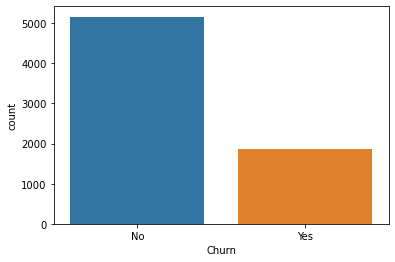

In [78]:
# Visualizing the target variable
sns.countplot(x = "Churn", data = churndata)
churndata.loc[:, 'Churn'].value_counts()

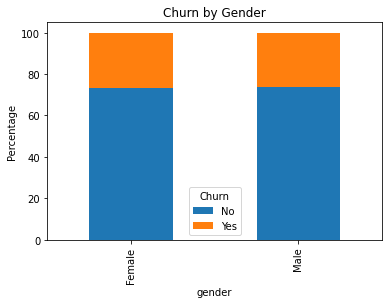

In [79]:
# Grouping the data by gender and churn status
churn_by_gender = churndata.groupby(['gender', 'Churn']).customerID.count()

# Calculating the percentage of each group
churn_by_gender_perc = churn_by_gender.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

# Creating a bar graph
ax = churn_by_gender_perc.unstack().plot(kind='bar', stacked=True)
ax.set_ylabel('Percentage')
ax.set_title('Churn by Gender')

#Visualizing the plot
plt.show()

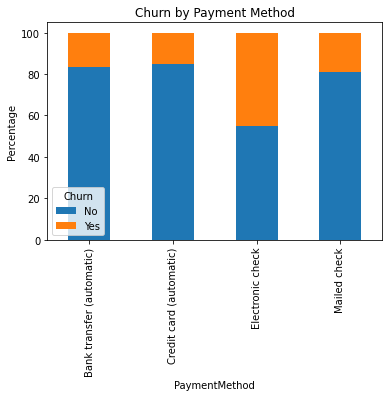

In [80]:
# Grouping the data by Payment Method and churn status
churn_by_pm = churndata.groupby(['PaymentMethod', 'Churn']).customerID.count()

# Calculating the percentage of each group
churn_by_pm_perc = churn_by_pm.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

# Creating a bar graph
ax = churn_by_pm_perc.unstack().plot(kind='bar', stacked=True)
ax.set_ylabel('Percentage')
ax.set_title('Churn by Payment Method')

#Visualizing the plot
plt.show()

Text(0, 0.5, '')

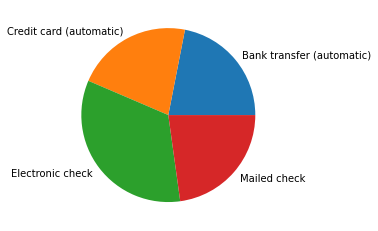

In [81]:
#Creating a Pie chart to visualize distribution of all customers by Pie Chart
churn_by_payment = churndata.groupby(['PaymentMethod']).customerID.count().plot(kind='pie', y='customerID')

#Removing axis labels
plt.xlabel("")
plt.ylabel("")

Text(0, 0.5, '')

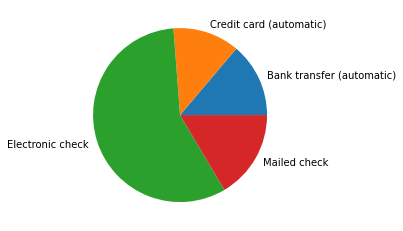

In [82]:
# Creating pie chart to visualize distribution of Churned Customers
churn_by_payment = churndata[churndata['Churn']=='Yes'].groupby(['PaymentMethod']).customerID.count().plot(kind='pie', y='customerID')

#Removing axis labels
plt.xlabel("")
plt.ylabel("")

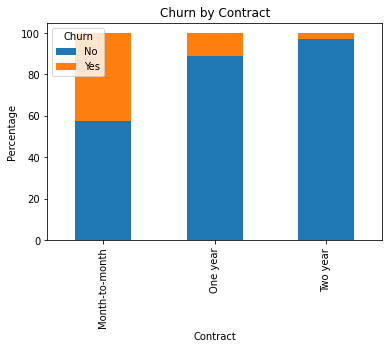

In [83]:
# Grouping the data by Contract and churn status
churn_by_contract = churndata.groupby(['Contract', 'Churn']).customerID.count()

# Calculating the percentage of each group
churn_by_contract_perc = churn_by_contract.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

# Creating a bar graph
ax = churn_by_contract_perc.unstack().plot(kind='bar', stacked=True)
ax.set_ylabel('Percentage')
ax.set_title('Churn by Contract')

#Visualizing the plot
plt.show()

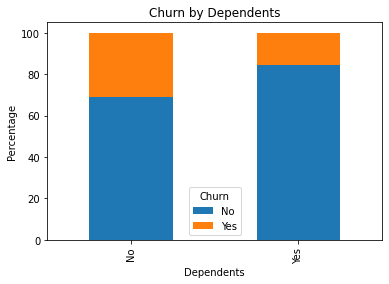

In [84]:
# Grouping the data by Dependents and churn status
churn_by_dependents = churndata.groupby(['Dependents', 'Churn']).customerID.count()

# Calculating the percentage of each group
churn_by_dependents_perc = churn_by_dependents.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

# Creating a bar graph
ax = churn_by_dependents_perc.unstack().plot(kind='bar', stacked=True)
ax.set_ylabel('Percentage')
ax.set_title('Churn by Dependents')

#Visualizing the plot
plt.show()

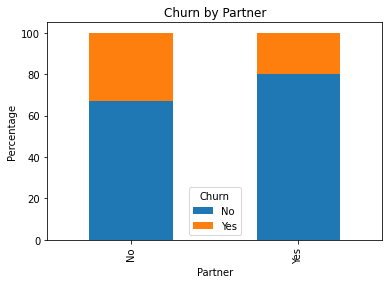

In [85]:
# Grouping the data by Partner and churn status
churn_by_partner = churndata.groupby(['Partner', 'Churn']).customerID.count()

# Calculating the percentage of each group
churn_by_partner_perc = churn_by_partner.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

# Creating a bar graph
ax = churn_by_partner_perc.unstack().plot(kind='bar', stacked=True)
ax.set_ylabel('Percentage')
ax.set_title('Churn by Partner')

#Visualizing the plot
plt.show()

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

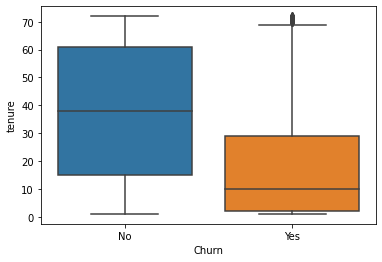

In [86]:
#Creating a Box plot to visulize any skewness in Tenure for churned customers
sns.boxplot(x = 'Churn', y = 'tenure', data=churndata)

<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>

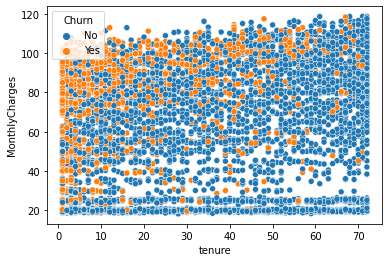

In [87]:
#Creating a Scatter plot to visualize any skewness in Tenure and Monthly Charges for churned and non Churned customers
sns.scatterplot(x = 'tenure', y = 'MonthlyCharges', hue = 'Churn', data=churndata)

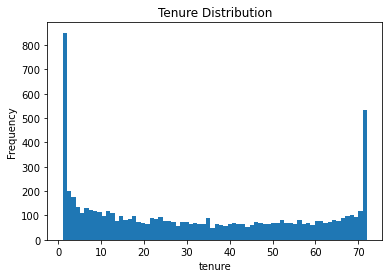

In [88]:
# Create a histogram of the 'tenure' column
plt.hist(churndata['tenure'], bins=70)
# Add axis labels and title
plt.xlabel('tenure')
plt.ylabel('Frequency')
plt.title('Tenure Distribution')

# Show the plot
plt.show()


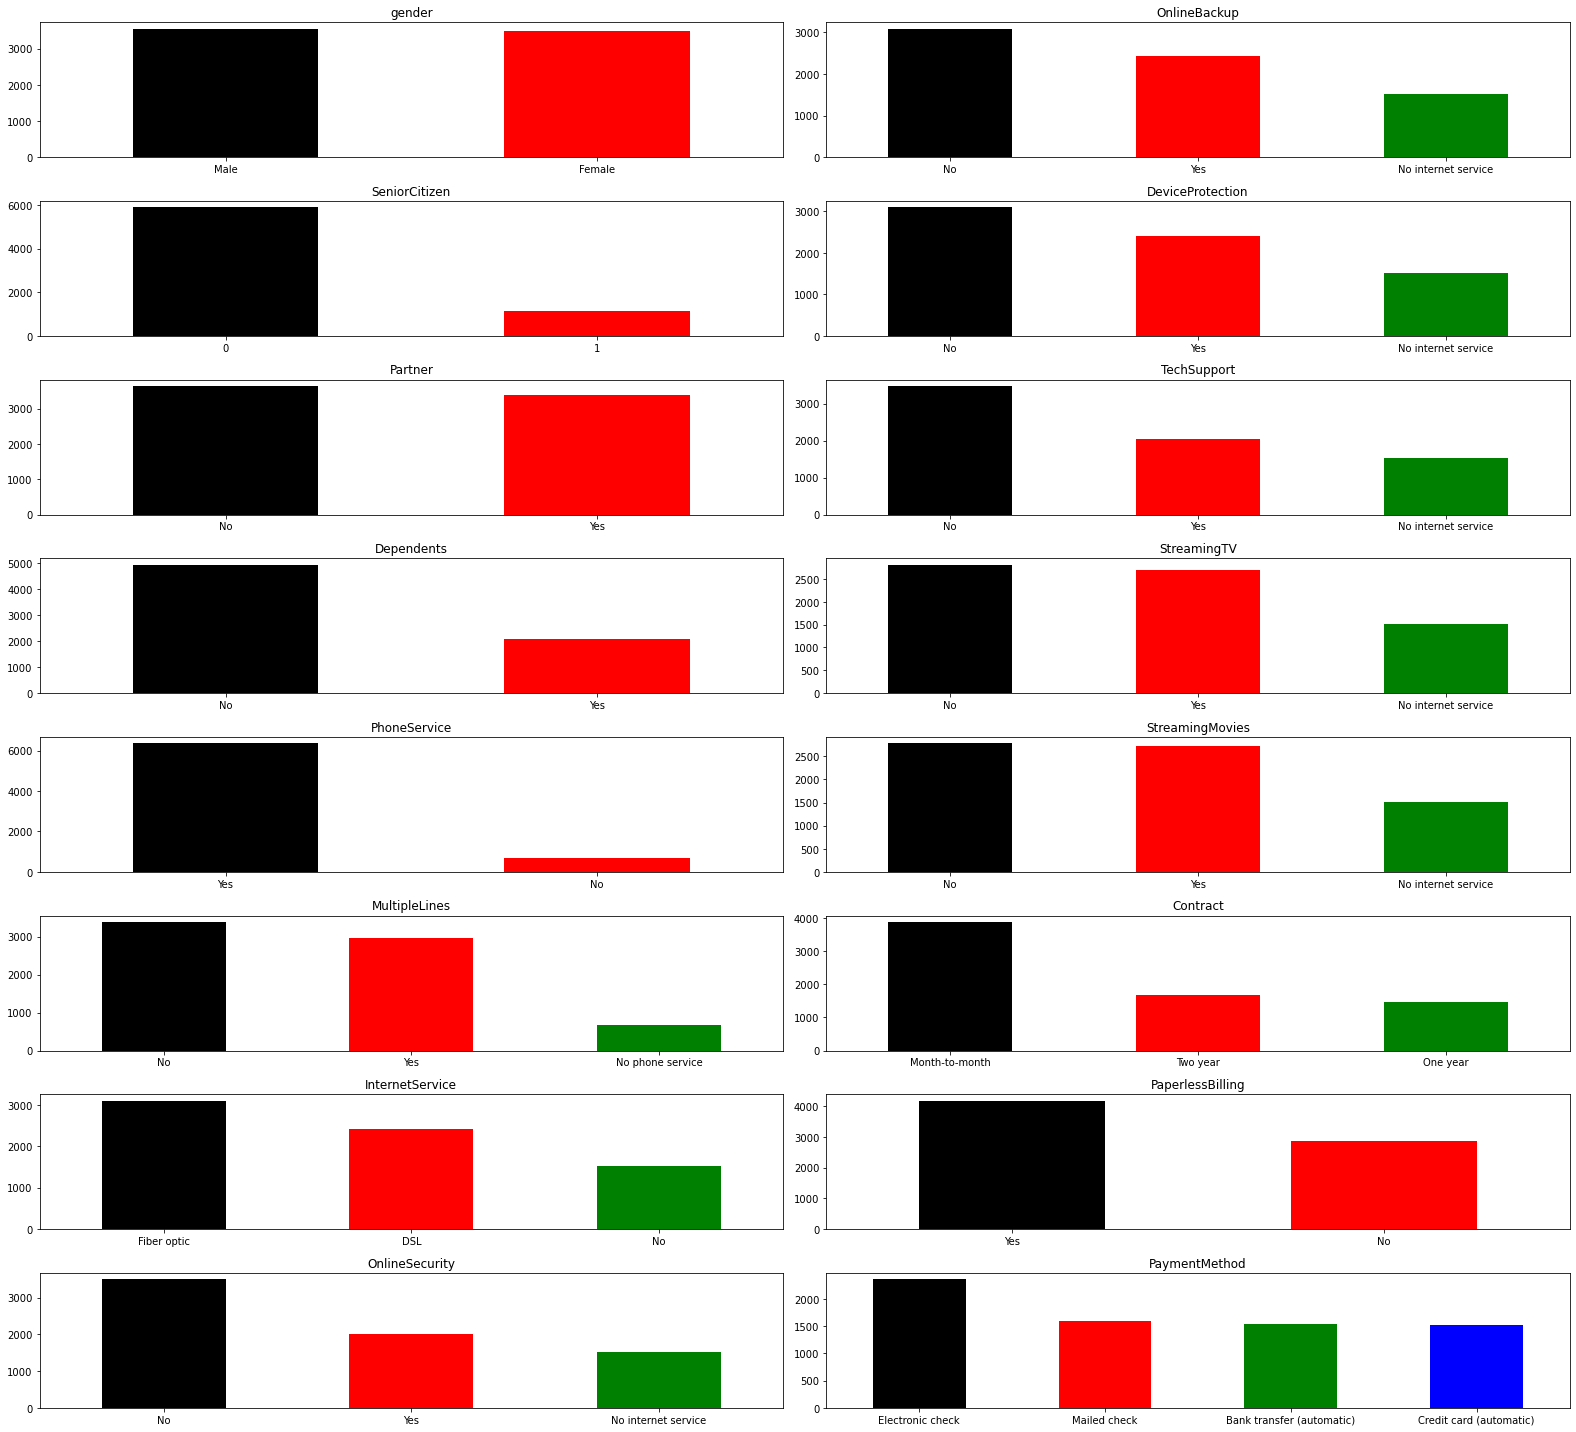

In [89]:
attributes = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod']
fig, axes = plt.subplots(nrows = 8, ncols = 2, figsize = (22,20))
for i, item in enumerate(attributes):
        if i < 8:
            ax = churndata[item].value_counts().plot(kind= 'bar', ax=axes[i,0], rot =0, color=['black', 'red', 'green', 'blue', 'cyan'])
        elif i >= 8:
            ax = churndata[item].value_counts().plot(kind= 'bar', ax=axes[i-8,1], rot =0, color=['black', 'red', 'green', 'blue', 'cyan'])
        ax.set_title(item)
        fig.tight_layout()

In [90]:
df = pd.DataFrame(churndata)

# convert categorical variables to integer codes
df['gender'] = pd.factorize(df['gender'])[0]
df['Partner'] = pd.factorize(df['Partner'])[0]
df['Partner'] = df['Partner'].max() - df['Partner']
df['Dependents'] = pd.factorize(df['Dependents'])[0]
df['Churn'] = pd.factorize(df['Churn'])[0]
df['PhoneService'] = pd.factorize(df['PhoneService'])[0]
df['MultipleLines'] = pd.factorize(df['MultipleLines'])[0]
df['MultipleLines'] = df['MultipleLines'].replace({1:0, 2:1})
df['OnlineSecurity'] = pd.factorize(df['OnlineSecurity'])[0]
df['OnlineSecurity'] = df['OnlineSecurity'].replace(2,0)
df['OnlineBackup'] = df['OnlineBackup'].replace({'Yes': 1, 'No': 0, 'No internet service': 2})
df['DeviceProtection'] = df['DeviceProtection'].replace({'Yes': 1, 'No': 0, 'No internet service': 2})
df['TechSupport'] = df['TechSupport'].replace({'Yes': 1, 'No': 0, 'No internet service': 2})
df['StreamingTV'] = df['StreamingTV'].replace({'Yes': 1, 'No': 0, 'No internet service': 2})
df['StreamingMovies'] = df['StreamingMovies'].replace({'Yes': 1, 'No': 0, 'No internet service': 2})
df['PaperlessBilling'] = df['PaperlessBilling'].replace({'Yes': 1, 'No': 0})
df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})

In [91]:
#OneHotEncoding PaymentMethod column
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
one_hot = pd.get_dummies(df['PaymentMethod'])
# Drop column B as it is now encoded
df = df.drop('PaymentMethod',axis = 1)
# Join the encoded df
df = df.join(one_hot)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,7590-VHVEG,0,0,1,0,1,0,0,DSL,0,...,0,Month-to-month,1,29.85,29.85,0,0,0,1,0
1,5575-GNVDE,1,0,0,0,34,1,0,DSL,1,...,0,One year,0,56.95,1889.50,0,0,0,0,1
2,3668-QPYBK,1,0,0,0,2,1,0,DSL,1,...,0,Month-to-month,1,53.85,108.15,1,0,0,0,1
3,7795-CFOCW,1,0,0,0,45,0,0,DSL,1,...,0,One year,0,42.30,1840.75,0,1,0,0,0
4,9237-HQITU,0,0,0,0,2,1,0,Fiber optic,0,...,0,Month-to-month,1,70.70,151.65,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,1,DSL,1,...,1,One year,1,84.80,1990.50,0,0,0,0,1
7039,2234-XADUH,0,0,1,1,72,1,1,Fiber optic,0,...,1,One year,1,103.20,7362.90,0,0,1,0,0
7040,4801-JZAZL,0,0,1,1,11,0,0,DSL,1,...,0,Month-to-month,1,29.60,346.45,0,0,0,1,0
7041,8361-LTMKD,1,1,1,0,4,1,1,Fiber optic,0,...,0,Month-to-month,1,74.40,306.60,1,0,0,0,1


In [92]:
churndata['Churn'] = np.where(churndata['Churn']=="Yes", 1, 0)
churndata['Churn'] = pd.to_numeric(churndata['Churn'])

In [93]:
#checking if any customers exist with zero tenure
count_by_tenure = churndata.groupby('tenure')['customerID'].count()

In [94]:
count_by_tenure

tenure
1     613
2     238
3     200
4     176
5     133
     ... 
68    100
69     95
70    119
71    170
72    362
Name: customerID, Length: 72, dtype: int64

In [95]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
gender,1.000000,-0.001819,-0.001379,0.010349,0.005285,-0.007515,-0.008883,-0.016328,-0.002978,0.004526,...,0.000578,-0.001339,-0.011902,-0.013779,0.000048,-0.008545,-0.015973,0.001632,0.000844,0.013199
SeniorCitizen,-0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.142996,-0.038576,-0.152380,-0.156700,...,-0.129721,-0.120658,0.156258,0.219874,0.102411,0.150541,-0.016235,-0.024359,0.171322,-0.152987
Partner,-0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,0.142561,0.143346,0.086346,0.093391,...,0.079066,0.075310,-0.013957,0.097825,0.319072,-0.149982,0.111406,0.082327,-0.083207,-0.096948
Dependents,0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.024307,0.080786,0.160845,0.154819,...,0.138809,0.125086,-0.110131,-0.112343,0.064653,-0.163128,0.052369,0.061134,-0.149274,0.056448
tenure,0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.332399,0.328297,0.180896,0.180895,...,0.138208,0.142143,0.004823,0.246862,0.825880,-0.354049,0.243822,0.232800,-0.210197,-0.232181
PhoneService,-0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,0.279530,-0.091676,0.149932,0.138938,...,0.171773,0.164379,0.016696,0.248033,0.113008,0.011691,0.008271,-0.006916,0.002747,-0.004463
MultipleLines,-0.008883,0.142996,0.142561,-0.024307,0.332399,0.279530,1.000000,0.098592,-0.099483,-0.099825,...,-0.063083,-0.062016,0.163746,0.490912,0.469042,0.040033,0.075429,0.060319,0.083583,-0.227672
OnlineSecurity,-0.016328,-0.038576,0.143346,0.080786,0.328297,-0.091676,0.098592,1.000000,-0.179049,-0.184217,...,-0.247209,-0.239910,-0.004051,0.296447,0.412619,-0.171270,0.094366,0.115473,-0.112295,-0.079918
OnlineBackup,-0.002978,-0.152380,0.086346,0.160845,0.180896,0.149932,-0.099483,-0.179049,1.000000,0.740244,...,0.720277,0.716388,-0.261565,-0.537727,-0.085017,-0.291047,0.051950,0.057233,-0.301330,0.231894
DeviceProtection,0.004526,-0.156700,0.093391,0.154819,0.180895,0.138938,-0.099825,-0.184217,0.740244,1.000000,...,0.762742,0.766635,-0.275519,-0.512604,-0.077394,-0.281048,0.049514,0.069858,-0.302989,0.223777


<AxesSubplot:>

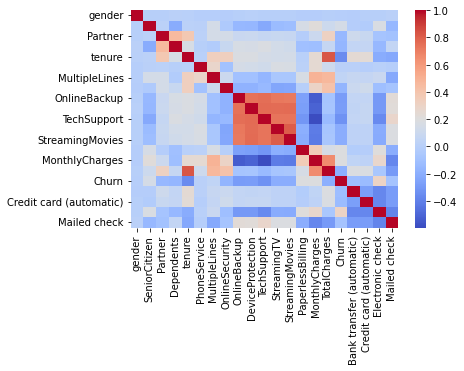

In [96]:
sns.heatmap(df.corr(), cmap='coolwarm')

<AxesSubplot:>

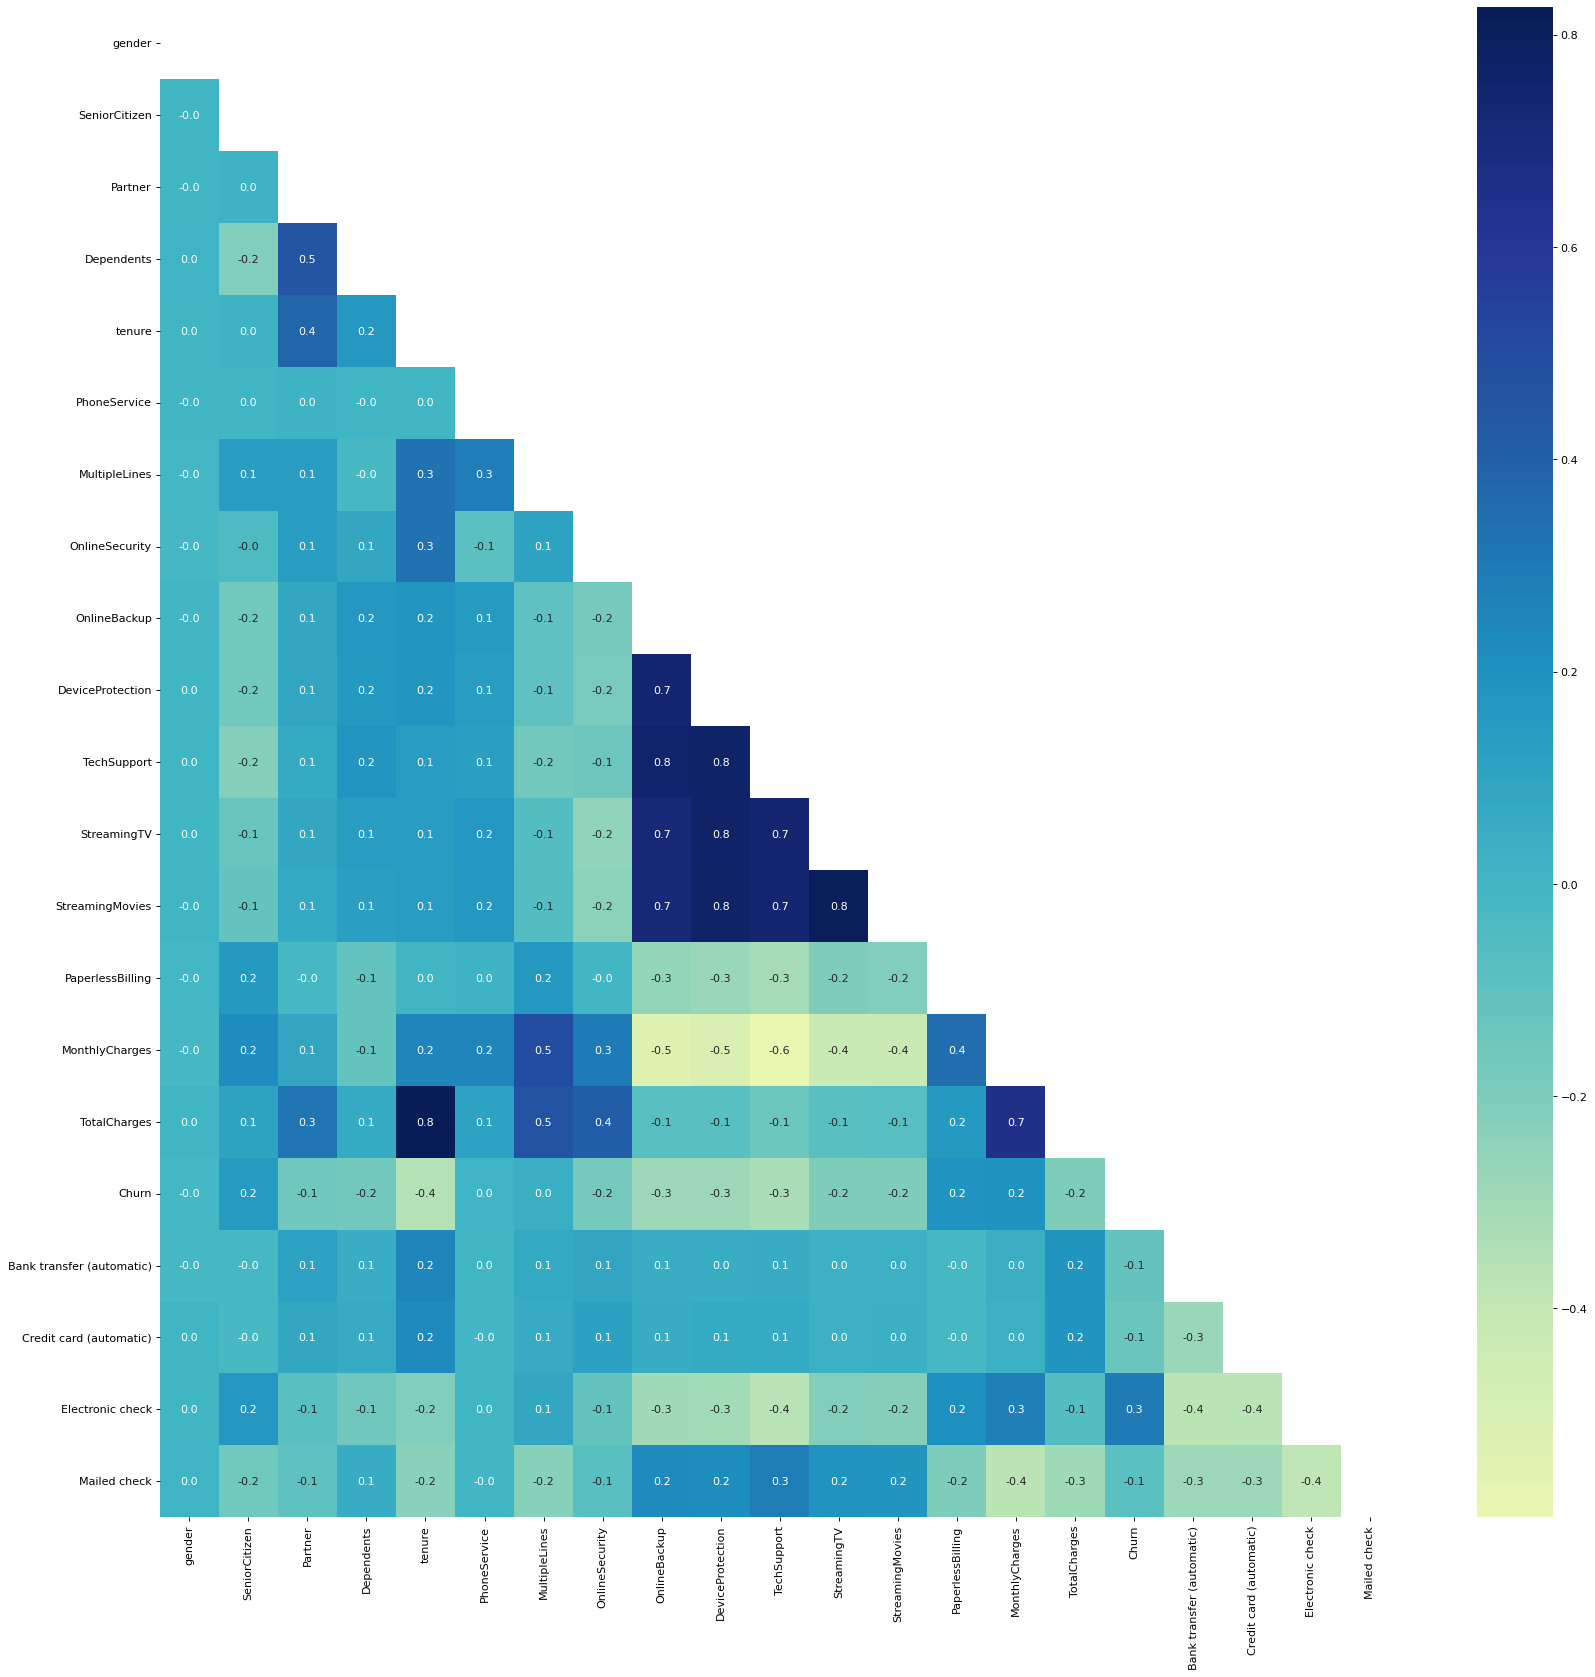

In [97]:
matrix = np.triu(np.ones_like(df.corr()))
fig, ax = plt.subplots(figsize=(25,25),dpi=80, facecolor='w', edgecolor='k')
sns.heatmap(df.corr(), mask= matrix, cmap="YlGnBu", annot = True, fmt = '.1f', center = 0,annot_kws={"fontsize":10})

In [98]:
var = ['tenure' ,'OnlineBackup', 'DeviceProtection','TechSupport' ,'StreamingTV','StreamingMovies','PaperlessBilling','MonthlyCharges','Electronic check']
X = df[var]
Y = df['Churn']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state=120)
print(y_train.value_counts())

0    3905
1    1369
Name: Churn, dtype: int64


In [99]:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()
col = X_train.columns

X_train[col] = scale.fit_transform(X_train[col])
X_test[col] = scale.transform(X_test[col])

In [100]:
#KNN
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


param_grid = {'n_neighbors': [5, 10, 15, 20, 25, 30 , 35 , 45]}
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best k chosen :", grid.best_params_['n_neighbors'])
print("the Test accuracy under the best model:", grid.score(X_test, y_test))
print("Mean validation accuracy:", grid.best_score_)

Best k chosen : 45
the Test accuracy under the best model: 0.7690557451649602
Mean validation accuracy: 0.7912398715792692


In [101]:
#Linear Regression
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train , y_train)

LinearRegression()

In [102]:
print(model.score(X_test , y_test))
print(model.score(X_train, y_train))


0.2382109382715747
0.2516761217051612


In [103]:
#Ridge Linear Regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
# 1. Define a list of parameters (key is 'alpha')
param_ridge = {'alpha': [0.00001, 0.0001, 0.001, 0.01, 1, 10 , 100, 1000]}

# 2. Define function and fit the data
grid_ridge = Ridge()
grid_ridge_est = GridSearchCV(grid_ridge, param_ridge, cv=5)

grid_ridge_est.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 1, 10, 100,
                                   1000]})

In [104]:
print(grid_ridge_est.best_params_)
print(grid_ridge_est.best_score_)
print(grid_ridge_est.score(X_test, y_test))

{'alpha': 10}
0.2467285680989942
0.2379073560849253


In [105]:
# Lasso Regression
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
# 1. Define a list of parameters (key is 'alpha')
params = {'alpha': [0.00001, 0.0001, 0.001, 0.01, 1, 10 , 100, 1000]}

# 2. Define function and fit the data
grid_lasso = Lasso()
grid_lasso_est = GridSearchCV(grid_lasso, params, cv=5)

grid_lasso_est.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 1, 10, 100,
                                   1000]})

In [106]:
print(grid_lasso_est.best_params_)
print(grid_lasso_est.best_score_)
print(grid_lasso_est.score(X_test, y_test))

{'alpha': 0.0001}
0.2466854849678683
0.23816211635576345


In [107]:
#Polynomial Regression
# load gridsearchCV
from sklearn.model_selection import GridSearchCV

# Load other modules
from sklearn.preprocessing  import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

# S1. Define grid of parameter. 
## The name should be exactly the same, otherwise cannot find which to specify.

param_poly = {'polynomialfeatures__degree': range(1,6)  }

# S2. Define estimator: use make_pipeline to combine two functions. 
grid_poly = PolynomialFeatures()
grid_lr = LinearRegression()
grid_pipe = make_pipeline(grid_poly, grid_lr)

# S3. Define GridSearchCV Estimation function, then train the model
gridsearch_poly = GridSearchCV(grid_pipe, param_poly, cv=5)

gridsearch_poly.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'polynomialfeatures__degree': range(1, 6)})

In [108]:
print(gridsearch_poly.best_params_)
print(gridsearch_poly.best_score_)
print(gridsearch_poly.best_estimator_)

{'polynomialfeatures__degree': 2}
0.25678787096755923
Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])


In [109]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

opt_tree = DecisionTreeClassifier(random_state = 0)

dt_params = {'max_depth':  range(1,10)         ,
             'min_samples_split':   range(2,11),
             'max_leaf_nodes':    range(2,11)   }

grid_tree = GridSearchCV(opt_tree, dt_params)
grid_tree.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': range(1, 10),
                         'max_leaf_nodes': range(2, 11),
                         'min_samples_split': range(2, 11)})

In [110]:
print(grid_tree.best_params_)
print(grid_tree.best_score_)
print(grid_tree.score(X_test, y_test))

{'max_depth': 4, 'max_leaf_nodes': 8, 'min_samples_split': 2}
0.7904799589916994
0.7650739476678043


In [111]:
# Linear SVC with GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
# Define Function
linear_svc = LinearSVC(random_state = 22) # must specify random state here

# Define a list of hyperparameters
params_svc = {'C': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 100000]  }

grid_lr_svc = GridSearchCV(linear_svc, params_svc, n_jobs=2)

grid_lr_svc.fit(X_train, y_train)

/Applications/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarni

GridSearchCV(estimator=LinearSVC(random_state=22), n_jobs=2,
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                               100000]})

In [112]:
print(grid_lr_svc.best_params_)
print(grid_lr_svc.best_score_)
print(grid_lr_svc.score(X_test, y_test))

{'C': 0.1}
0.8003399372285225
0.7787258248009101


In [137]:
class_names = ["Not churn","Churn"]
conf_matrix= confusion_matrix(y_test, LR_y_pred, labels=class_names)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=class_names)
disp.plot()
plt.show()

ValueError: At least one label specified must be in y_true

In [114]:
#SVM model with Polynomial kernel
from sklearn.svm import SVC
svm_model = SVC(kernel='poly', degree=2) # degree is the polynomial degree, set it to the desired value
svm_model.fit(X_train, y_train)

# Use the model to make predictions on the testing data
y_pred = svm_model.predict(X_test)

# Calculate the accuracy score and confusion matrix
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score and confusion matrix
print('Accuracy:', accuracy)


Accuracy: 0.7633674630261661


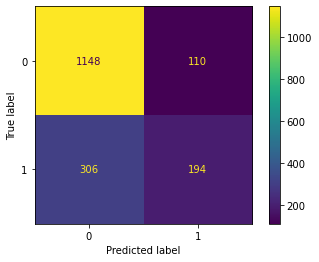

In [115]:
conf_matrix = confusion_matrix(y_test, y_pred, labels=svm_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=svm_model.classes_)
disp.plot()
plt.show()

In [116]:
#SVM model with RBF kernel
# Create the SVM model with RBF kernel and fit it to the training data
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train, y_train)

# Use the model to make predictions on the testing data
y_pred = svm_model.predict(X_test)

# Calculate the accuracy score and confusion matrix
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score and confusion matrix
print('Accuracy:', accuracy)

Accuracy: 0.7741751990898749


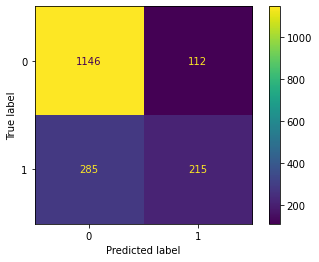

In [117]:
conf_matrix = confusion_matrix(y_test, y_pred, labels=svm_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=svm_model.classes_)
disp.plot()
plt.show()

In [125]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [126]:
#LogisticRegression
LR = LogisticRegression()
result_LR = LR.fit(X_train, y_train)
LR_y_pred = LR.predict(X_test)

cross_val_LR = cross_val_score(LR, X_train, y_train, scoring = 'accuracy') 
cross_val_LR_f1 = cross_val_score(LR, X_train, y_train, scoring = 'f1') 

In [127]:
score = LR.score(X_test, y_test)
print(score)

0.7764505119453925


In [135]:
conf_matrix= confusion_matrix(y_test, LR_y_pred, labels=LR.classes)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=LR.classes_)
disp.plot()
plt.show()

AttributeError: 'LogisticRegression' object has no attribute 'class_names'

In [132]:
#RandomForestClassifier
RF = RandomForestClassifier(criterion='entropy', min_samples_leaf=2,min_samples_split=6, n_estimators=1000, random_state=0)
result_RF = RF.fit(X_train, y_train)
RF_y_pred = RF.predict(X_test)

cross_val_RF = cross_val_score(RF, X_train, y_train, scoring = 'accuracy') 
cross_val_RF_f1 = cross_val_score(RF, X_train, y_train, scoring = 'f1') 


In [130]:
score = RF.score(X_test, y_test)
print(score)

0.7770193401592719


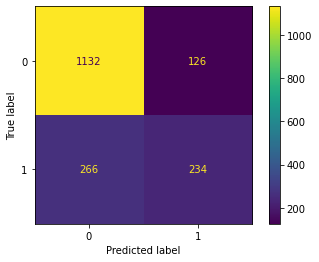

In [131]:
conf_matrix= confusion_matrix(y_test, RF_y_pred, labels=RF.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=RF.classes_)
disp.plot()
plt.show()

Model score: 0.7764505119453925


ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of ticklabels (4).

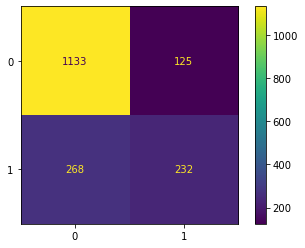

In [136]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Train the Logistic Regression model
LR = LogisticRegression()
result_LR = LR.fit(X_train, y_train)

# Make predictions on the test data
LR_y_pred = LR.predict(X_test)

# Calculate and print the model score
score = LR.score(X_test, y_test)
print('Model score:', score)

# Calculate cross-validation scores
cross_val_LR = cross_val_score(LR, X_train, y_train, scoring='accuracy') 
cross_val_LR_f1 = cross_val_score(LR, X_train, y_train, scoring='f1') 

# Define class names for the confusion matrix
class_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

# Calculate the confusion matrix for the Logistic Regression model
conf_matrix = confusion_matrix(y_test, LR_y_pred)

# Display the confusion matrix with class names
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)
disp.plot()
plt.show()
